# **Decision Tree Classifier**

The objective of this dataset is the predict the species of the penguin based on the following parameters:
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
- sex

[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset)

### Step 1: Import the necessary libraries

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

#for finding out the accuracy of the model
from sklearn import metrics

### Step 2: Load the dataset

In [2]:
df=pd.read_csv('penguins.csv')

### Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [3]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [5]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
df.shape

(344, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Step 4: Statistical Insights


In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Step 5: Data Cleaning

Handling outliers, duplicates and missing values

**Missing Values**

In [9]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Duplicate Values**

In [12]:
df.duplicated().sum()

0

### Step 6:Feature Selection

In [13]:
df=df.drop(['island'],axis=1)

In [14]:
def gender(row):
    if row['sex'] == "male":
        return 0 
    else:
        return 1
df['sex'] = df.apply(gender,axis=1)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,0
1,Adelie,39.5,17.4,186.0,3800.0,1
2,Adelie,40.3,18.0,195.0,3250.0,1
4,Adelie,36.7,19.3,193.0,3450.0,1
5,Adelie,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,0
340,Chinstrap,43.5,18.1,202.0,3400.0,1
341,Chinstrap,49.6,18.2,193.0,3775.0,0
342,Chinstrap,50.8,19.0,210.0,4100.0,0


### Step 7: Data Visualisation

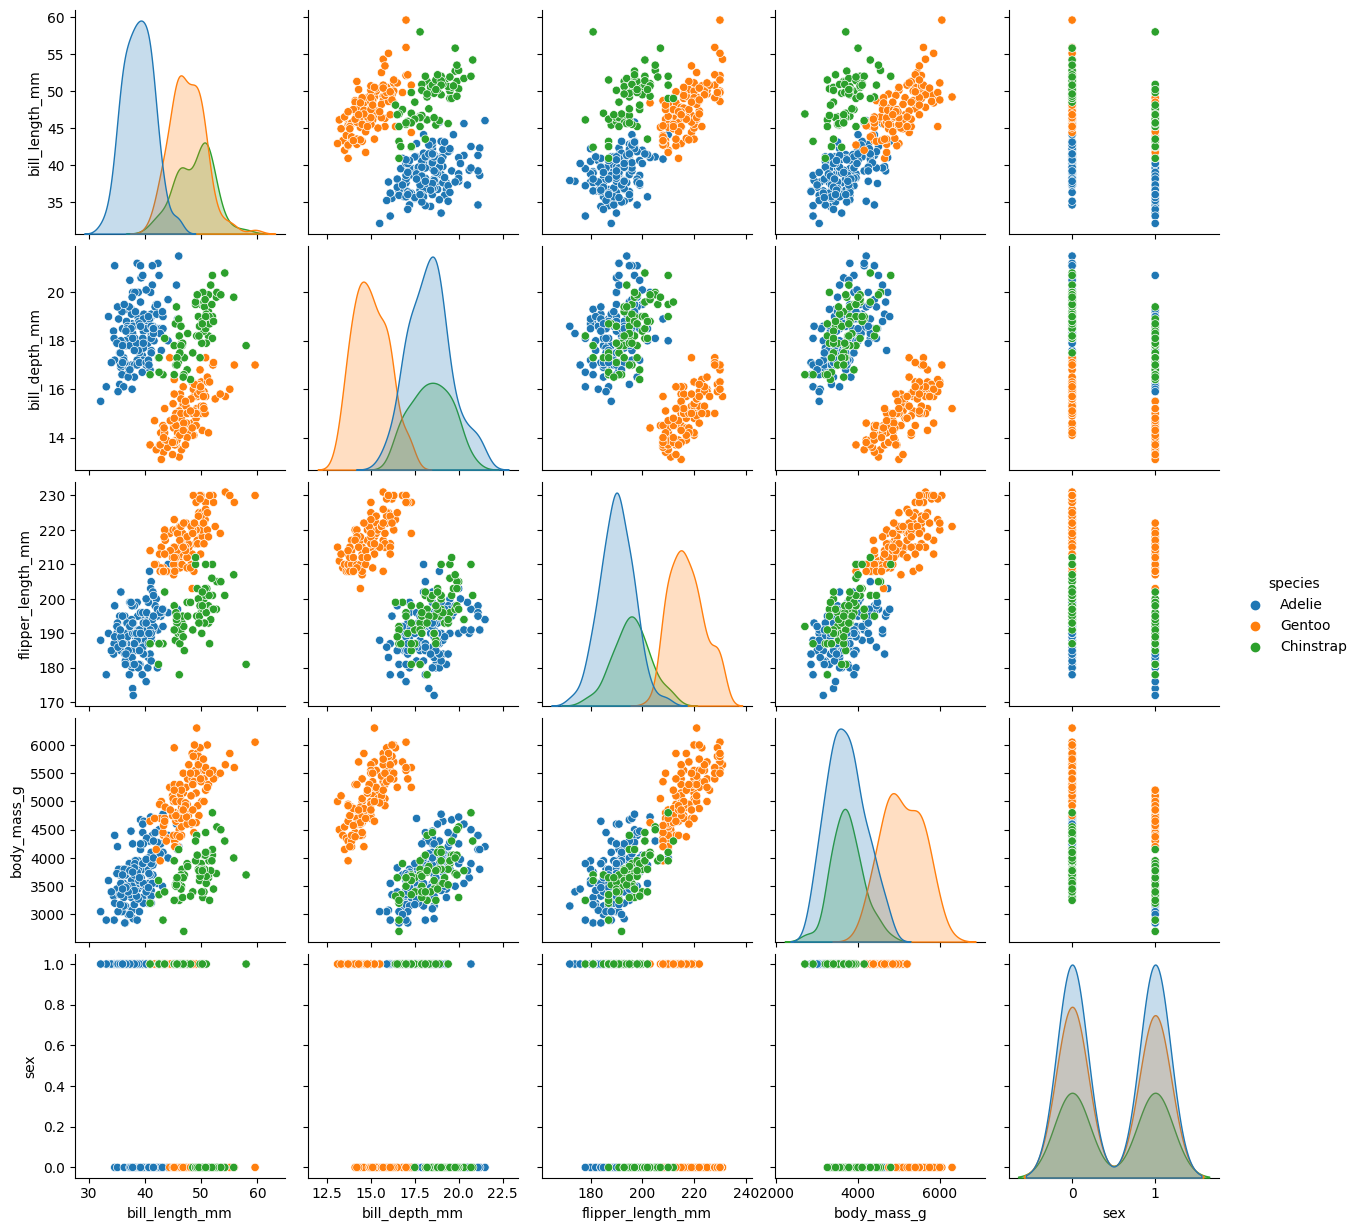

In [15]:
# Visualize the whole dataset
sns.pairplot(df, hue='species')

### Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Using the **Decision Tree Classifier** Algorithm
  - Allow us to classify penguins in species using certain parameters

**Training and Testing Sets**

In [16]:
# x=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].values
# x[0:5]
x=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']].values
x[0:5]

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       [3.67e+01, 1.93e+01, 1.93e+02, 3.45e+03, 1.00e+00],
       [3.93e+01, 2.06e+01, 1.90e+02, 3.65e+03, 0.00e+00]])

In [17]:
y=df['species'].values
y[0:5]

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((233, 5), (233,), (100, 5), (100,))

**Data Modelling and Fitting**

In [20]:
clf=DecisionTreeClassifier(criterion="entropy")

In [21]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred=clf.predict(x_test)

**Decision Tree Visualisation**

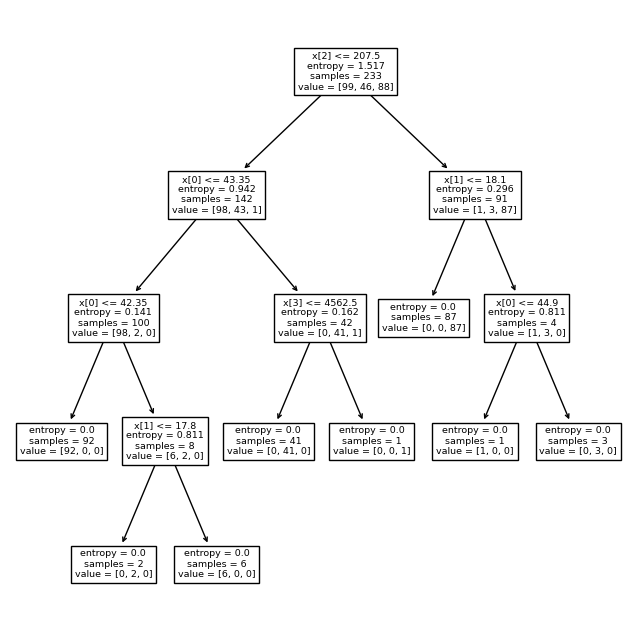

In [23]:
plt.figure(figsize=(8,8))
tree.plot_tree(clf)
plt.show()

### Step 9: Model Evaluation

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


### Step 10: Testing the Model

- Take user input and predict the output

In [25]:
inp = []

inp_len = int(input('Enter the number of sets you want to predict the class of : '))

for val in range(inp_len):
    print('\nSet ', val+1, ': ')
    ele = [float(input('bill_length_mm : ')), float(input('bill_depth_mm : ')), float(input('flipper_length_mm : ')),float(input('body_mass_g : ')),int(input('gender : '))]
    inp.append(ele)
    

X_new = np.array(inp)

#Prediction of the species from the input vector
Y_pred = clf.predict(X_new)

print('\nAnswers')
for ans in range(inp_len):
  print('\nSet ', ans+1, ': ')
  print('bill_length_mm\tbill_depth_mm\tflipper_length_mm\tbody_mass_g\tgender')
  print(inp[ans][0],'\t\t',inp[ans][1],'\t\t',inp[ans][2],'\t\t\t',inp[ans][3],'\t',inp[ans][4])
  print('Predicted Class : ',Y_pred[ans])



Set  1 : 

Answers

Set  1 : 
bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g	gender
47.0 		 18.0 		 201.0 			 3403.0 	 0
Predicted Class :  Chinstrap
